# IAC-31 Assignment 01: Titanic Survival Prediction

**Student Name:** Mahmud Galib  
**Course:** IAC-31 - Introduction to Artificial Intelligence and Computing  
**Institution:** Bangladesh University of Engineering and Technology (BUET)  
**Assignment:** Assignment 01 - Titanic Dataset


## 1. Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## 2. Load and Explore the Dataset

In [2]:
train_data = pd.read_csv('titanic/train.csv')
test_data = pd.read_csv('titanic/test.csv')

print(f"Training data shape: {train_data.shape}")
print(f"Test data shape: {test_data.shape}")
print("\nFirst few rows:")
train_data.head()

Training data shape: (891, 12)
Test data shape: (418, 11)

First few rows:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
print("Dataset Information:")
print(train_data.info())
print("\nMissing Values:")
print(train_data.isnull().sum())
print("\nSurvival Statistics:")
print(train_data['Survived'].value_counts())
print(f"Survival Rate: {train_data['Survived'].mean():.3f}")

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

Missing Values:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin      

## 3. Data Visualization and Analysis

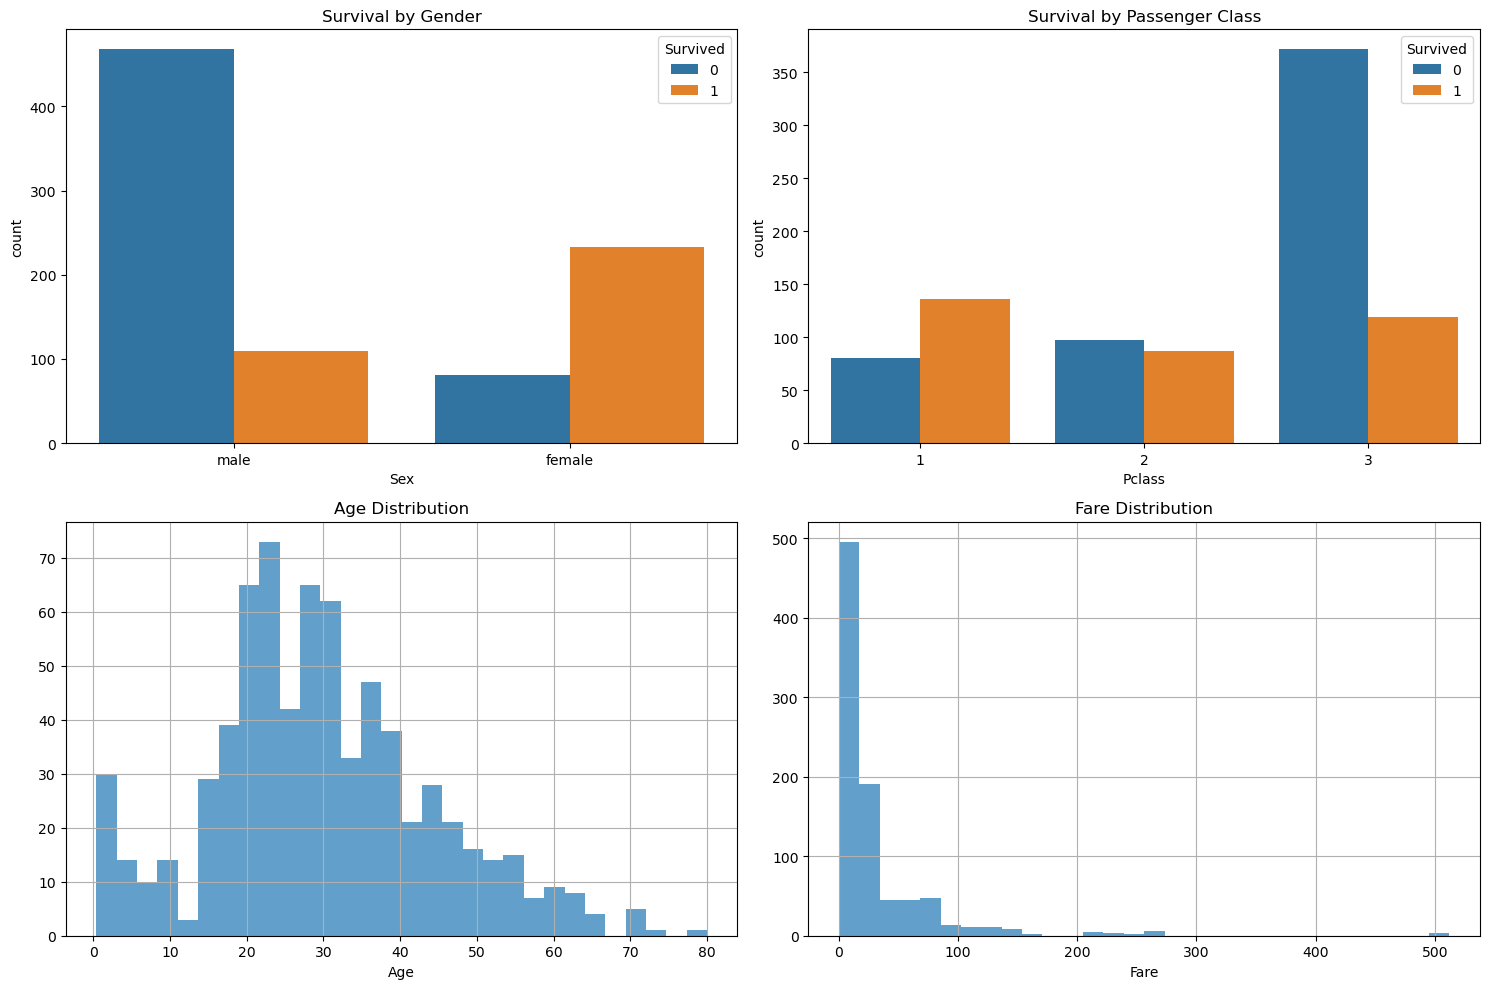

Key Insights:
Female survival rate: 0.742
Male survival rate: 0.189
1st class survival rate: 0.630
3rd class survival rate: 0.242


In [4]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

sns.countplot(data=train_data, x='Sex', hue='Survived', ax=axes[0,0])
axes[0,0].set_title('Survival by Gender')

sns.countplot(data=train_data, x='Pclass', hue='Survived', ax=axes[0,1])
axes[0,1].set_title('Survival by Passenger Class')

train_data['Age'].hist(bins=30, alpha=0.7, ax=axes[1,0])
axes[1,0].set_title('Age Distribution')
axes[1,0].set_xlabel('Age')

train_data['Fare'].hist(bins=30, alpha=0.7, ax=axes[1,1])
axes[1,1].set_title('Fare Distribution')
axes[1,1].set_xlabel('Fare')

plt.tight_layout()
plt.show()

print("Key Insights:")
print(f"Female survival rate: {train_data[train_data['Sex']=='female']['Survived'].mean():.3f}")
print(f"Male survival rate: {train_data[train_data['Sex']=='male']['Survived'].mean():.3f}")
print(f"1st class survival rate: {train_data[train_data['Pclass']==1]['Survived'].mean():.3f}")
print(f"3rd class survival rate: {train_data[train_data['Pclass']==3]['Survived'].mean():.3f}")

## 4. Data Preprocessing and Feature Engineering

In [5]:
def preprocess_data(df):
    data = df.copy()

    data['Age'] = data['Age'].fillna(data['Age'].mean())

    data['Embarked'] = data['Embarked'].fillna('S')

    data['Fare'] = data['Fare'].fillna(data['Fare'].mean())

    data['Sex'] = data['Sex'].map({'male': 1, 'female': 0})

    data['Embarked'] = data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

    data['FamilySize'] = data['SibSp'] + data['Parch']

    features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'FamilySize']

    return data[features]

print("Simple preprocessing function created!")

Simple preprocessing function created!


In [6]:
X = preprocess_data(train_data)
y = train_data['Survived']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training features shape: {X_train.shape}")
print(f"Validation features shape: {X_val.shape}")
print(f"Features used: {list(X.columns)}")

Training features shape: (712, 8)
Validation features shape: (179, 8)
Features used: ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'FamilySize']


## 5. Train Decision Tree Model (Main Algorithm)

In [7]:
decision_tree = DecisionTreeClassifier(random_state=42, max_depth=5)

print("Training Decision Tree model...")
decision_tree.fit(X_train, y_train)

train_predictions = decision_tree.predict(X_train)
val_predictions = decision_tree.predict(X_val)

train_accuracy = accuracy_score(y_train, train_predictions)
val_accuracy = accuracy_score(y_val, val_predictions)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")
print("Decision Tree training completed!")

Training Decision Tree model...
Training Accuracy: 0.8638
Validation Accuracy: 0.7598
Decision Tree training completed!


## 6. Evaluate Decision Tree Performance

Decision Tree Model Performance:
Training Accuracy: 0.8638
Validation Accuracy: 0.7598


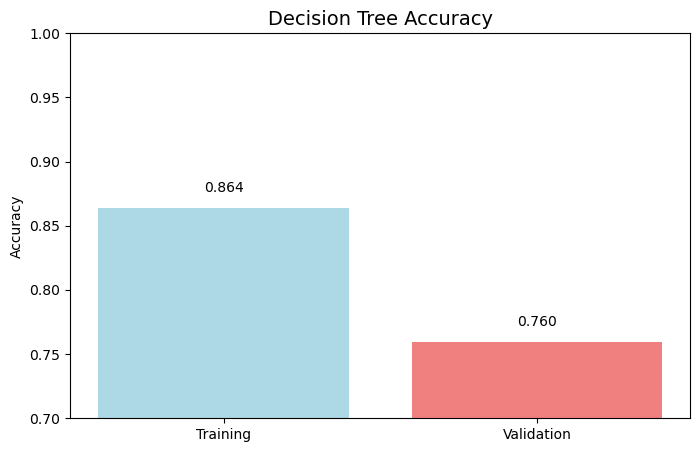

In [8]:
print("Decision Tree Model Performance:")
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")

plt.figure(figsize=(8, 5))
accuracies = [train_accuracy, val_accuracy]
labels = ['Training', 'Validation']
colors = ['lightblue', 'lightcoral']

bars = plt.bar(labels, accuracies, color=colors)
plt.title('Decision Tree Accuracy', fontsize=14)
plt.ylabel('Accuracy')
plt.ylim(0.7, 1.0)

for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f'{acc:.3f}', ha='center', va='bottom')

plt.show()

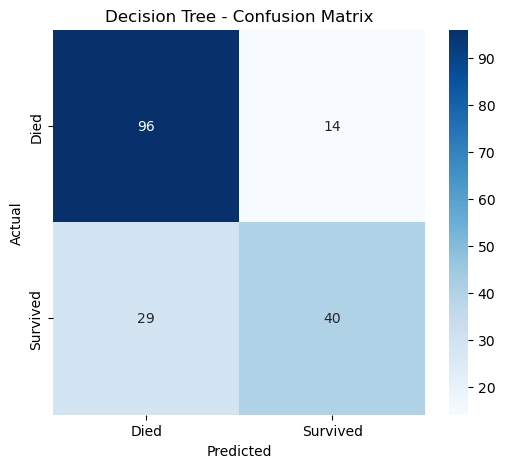

Classification Report:
              precision    recall  f1-score   support

        Died       0.77      0.87      0.82       110
    Survived       0.74      0.58      0.65        69

    accuracy                           0.76       179
   macro avg       0.75      0.73      0.73       179
weighted avg       0.76      0.76      0.75       179



In [9]:
plt.figure(figsize=(6, 5))
cm = confusion_matrix(y_val, val_predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Died', 'Survived'],
            yticklabels=['Died', 'Survived'])
plt.title('Decision Tree - Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

print("Classification Report:")
print(classification_report(y_val, val_predictions, target_names=['Died', 'Survived']))

## 7. Try Other Algorithms

In [10]:
print("Testing other algorithms for comparison...")

# Logistic Regression
logistic = LogisticRegression(random_state=42, max_iter=1000)
logistic.fit(X_train, y_train)
logistic_acc = accuracy_score(y_val, logistic.predict(X_val))

# KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_acc = accuracy_score(y_val, knn.predict(X_val))

# Neural Network
neural_net = MLPClassifier(hidden_layer_sizes=(50,), max_iter=500, random_state=42)
neural_net.fit(X_train, y_train)
nn_acc = accuracy_score(y_val, neural_net.predict(X_val))

print(f"Decision Tree Accuracy: {val_accuracy:.4f} ← Main algorithm")
print(f"Logistic Regression:    {logistic_acc:.4f}")
print(f"KNN:                    {knn_acc:.4f}")
print(f"Neural Network:         {nn_acc:.4f}")

Testing other algorithms for comparison...
Decision Tree Accuracy: 0.7598 ← Main algorithm
Logistic Regression:    0.8045
KNN:                    0.6983
Neural Network:         0.7989


## 8. Final Prediction

In [11]:
final_decision_tree = DecisionTreeClassifier(random_state=42, max_depth=5)
final_decision_tree.fit(X, y)

X_test = preprocess_data(test_data)

test_predictions = final_decision_tree.predict(X_test)

submission = pd.DataFrame({
    'PassengerId': test_data['PassengerId'],
    'Survived': test_predictions
})

submission.to_csv('prediction.csv', index=False)